<a href="https://colab.research.google.com/github/E1250/udl-ref/blob/main/ch13/13_3_Neighborhood_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 13.3: Neighborhood sampling**

This notebook investigates neighborhood sampling of graphs as in figure 13.10 from the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Let's construct the graph from figure 13.10, which has 23 nodes.

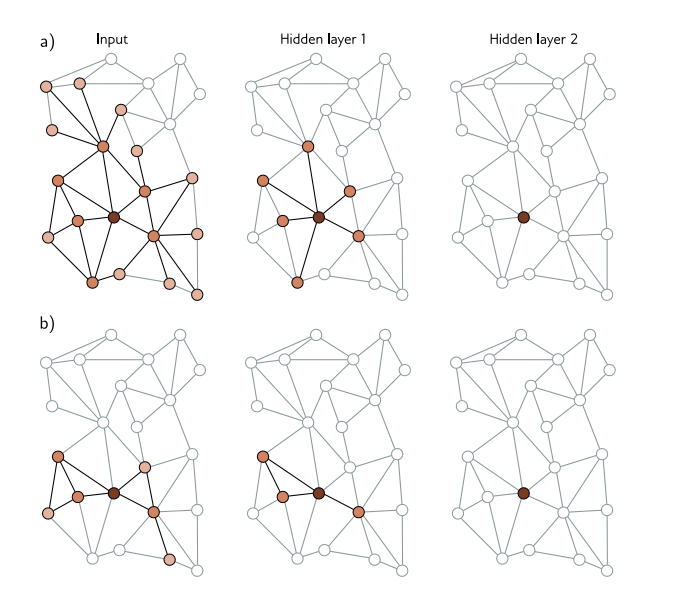

In [ ]:
# Define adjacency matrix
A = np.array([[0,1,1,1,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,0,1,0,0, 0,0,0,1,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,1,0,1,0, 0,0,0,0,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,0,1,0,1, 0,1,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,0, 1,0,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,0,1, 0,0,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,0, 0,0,1,0,1, 1,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,1, 1,1,0,0,0, 1,0,0,1,0, 0,0,0,0,0, 0,0,0],
              [0,1,0,0,0, 0,0,0,0,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,1,1,0,0, 0,1,0,1,0, 0,1,1,0,0, 0,1,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,1,1,0,0, 0,0,1,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 0,0,0,0,1, 1,1,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 1,0,0,1,0, 0,1,1,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,1,0,0, 0,0,1,0,0, 0,0,1,1,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,1,0,0,0, 1,0,0,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,1,0,0,1, 0,1,0,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 0,1,1,0,0, 1,0,1,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,1,1,0, 0,1,0,1,0, 1,1,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,1,0, 0,0,1,0,0, 0,0,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,1, 1,1,0,0,0, 1,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,0,1, 0,1,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,0,0, 1,0,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,1,0, 0,1,0]]);
print(A)

[[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 

In [ ]:
# Routine to draw graph structure, highlighting original node (brown in fig 13.10)
# and neighborhood nodes (orange in figure 13.10)
def draw_graph_structure(adjacency_matrix, original_node, neighborhood_nodes=None):

  G = nx.Graph()
  n_node = adjacency_matrix.shape[0]
  for i in range(n_node):
    for j in range(i):
      if adjacency_matrix[i,j]:
          G.add_edge(i,j)

  color_map = []

  for node in G:
    if original_node[node]:
      color_map.append('brown')
    else:
      if neighborhood_nodes[node]:
        color_map.append('orange')
      else:
        color_map.append('white')

  nx.draw(G, nx.spring_layout(G, seed = 7), with_labels=True, node_color=color_map)
  plt.show()

Output layer:


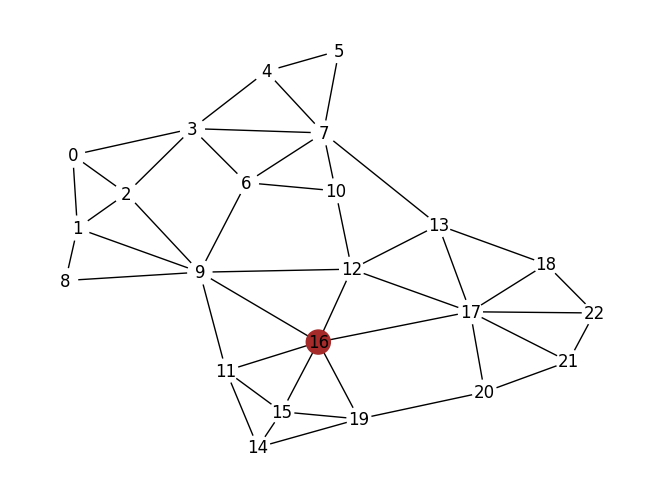

In [ ]:
n_nodes = A.shape[0]

# Define a single output layer node
output_layer_nodes=np.zeros((n_nodes,1)); output_layer_nodes[16]=1
# Define the neighboring nodes to draw (none)
neighbor_nodes = np.zeros((n_nodes,1))
print("Output layer:")
draw_graph_structure(A, output_layer_nodes, neighbor_nodes)

Let's imagine that we want to form a batch for a node labelling task that consists of just node 16 in the output layer (highlighted).   The network consists of the input, hidden layer 1, hidden layer2, and the output layer.

Hidden layer 2:


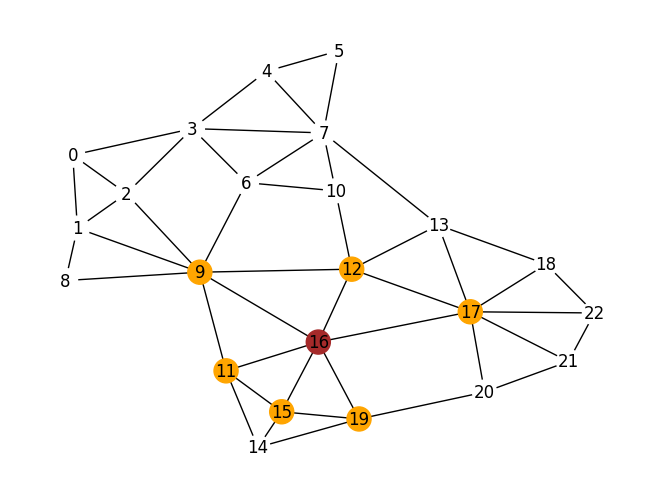

In [ ]:
# TODO Find the nodes in hidden layer 2 that connect to node 16 in the output layer
# using the adjacency matrix
# Replace this line:
hidden_layer2_nodes = A[:, 16];

print("Hidden layer 2:")
draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)

Hidden layer 1:


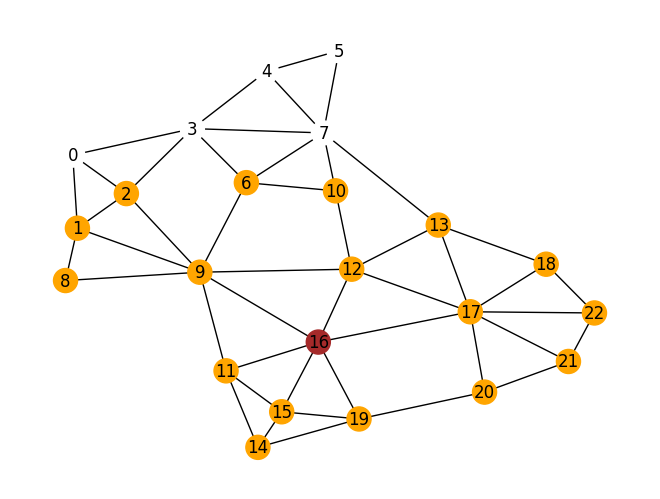

In [ ]:
# TODO - Find the nodes in hidden layer 1 that connect that connect to node 16 in the output layer
# using the adjacency matrix
# Replace this line:
# hidden_layer1_nodes = np.zeros((n_nodes,1));

# Step 1: Find the nodes in hidden layer 2 that connect to node 16 in the output layer
output_node_idx = 16
hidden_layer2_nodes = A[:, output_node_idx]  # Connections from hidden layer 2 to output layer

# Step 2: Now find the nodes in hidden layer 1 that connect to those in hidden layer 2
hidden_layer1_nodes = np.zeros((n_nodes))  # Initialize

for i in range(hidden_layer2_nodes.shape[0]):
    if hidden_layer2_nodes[i] == 1:  # If node in hidden layer 2 connects to output node 16
        hidden_layer1_nodes += A[:, i]  # Sum connections from hidden layer 1 to this node in hidden layer 2

print("Hidden layer 1:")
draw_graph_structure(A, output_layer_nodes, hidden_layer1_nodes)

Input layer:


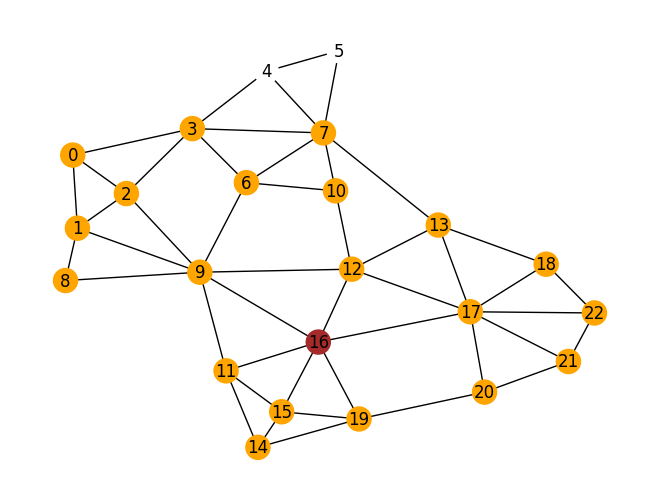

In [ ]:
# TODO Find the nodes in the input layer that connect to node 16 in the output layer
# using the adjacency matrix
# Replace this line:
# input_layer_nodes = np.zeros((n_nodes,1));

# Step 1: Find the nodes in hidden layer 2 that connect to node 16 in the output layer
output_node_idx = 16
hidden_layer2_nodes = A[:, output_node_idx]  # Connections from hidden layer 2 to output layer

# Step 2: Now find the nodes in hidden layer 1 that connect to those in hidden layer 2
hidden_layer1_nodes = np.zeros(n_nodes)  # Initialize as a 1D array
for i in range(hidden_layer2_nodes.shape[0]):
    if hidden_layer2_nodes[i] == 1:  # If node in hidden layer 2 connects to output node 16
        hidden_layer1_nodes += A[:, i]  # Sum connections from hidden layer 1 to this node in hidden layer 2

# Step 3: Find the input layer nodes that connect to the active nodes in hidden layer 1
input_layer_nodes = np.zeros(n_nodes)  # Initialize as a 1D array
for i in range(hidden_layer1_nodes.shape[0]):
    if hidden_layer1_nodes[i] > 0:  # If node in hidden layer 1 is active (connected)
        input_layer_nodes += A[:, i]  # Sum connections from input layer to this node in hidden layer 1

print("Input layer:")
draw_graph_structure(A, output_layer_nodes, input_layer_nodes)

This is bad news.  This is a fairly sparsely connected graph (i.e. adjacency matrix is mostly zeros) and there are only two hidden layers.  Nonetheless, we have to involve almost all the nodes in the graph to compute the loss at this output.

To resolve this problem, we'll use neighborhood sampling.  We'll start again with a single node in the output layer.

Output layer:


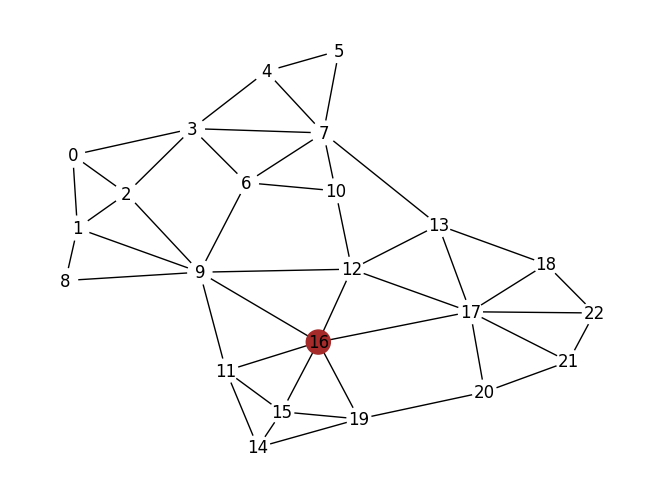

In [ ]:
print("Output layer:")
draw_graph_structure(A, output_layer_nodes, neighbor_nodes)

In [ ]:
# Define umber of neighbors to sample
n_sample = 3

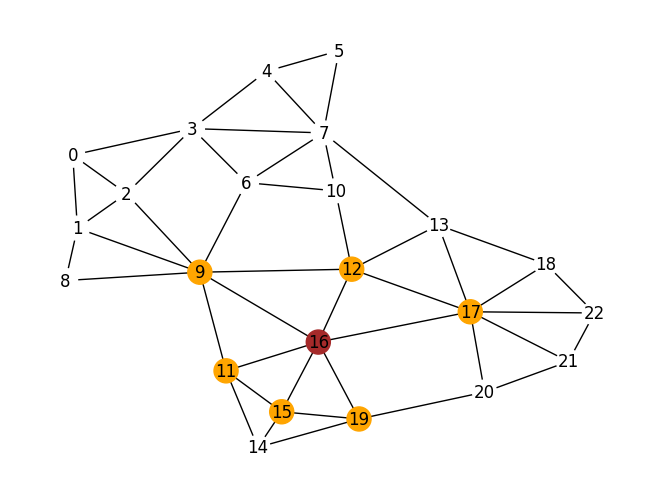

In [ ]:
# TODO Find the nodes in hidden layer 2 that connect to node 16 in the output layer
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.
# Replace this line:
# hidden_layer2_nodes = np.zeros((n_nodes,1));

# Step 1: Find the nodes in hidden layer 2 that connect to node 16 in the output layer
output_node_idx = 16
hidden_layer2_nodes = A[:, output_node_idx]  # Connections from hidden layer 2 to output layer
# Get indices of connected nodes
connected_nodes = np.where(hidden_layer2_nodes == 1)[0]  # Indices of nodes in hidden layer 2 that connect to node 16

# Step 2: Sample n_sample nodes from connected_nodes without replacement
n_sample = 5  # Define the number of samples you want
if len(connected_nodes) > 0:
    # Adjust n_sample if the population is smaller than n_sample
    n_sample = min(n_sample, len(connected_nodes))
    # Sample nodes
    sampled_nodes = np.random.choice(connected_nodes, size=n_sample, replace=False)
    # Create a mask for the sampled nodes
    hidden_layer2_sampled_nodes = np.zeros_like(hidden_layer2_nodes)
    hidden_layer2_sampled_nodes[sampled_nodes] = 1
else:
    hidden_layer2_sampled_nodes = np.zeros_like(hidden_layer2_nodes)  # If no nodes connected, use zero array

draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)

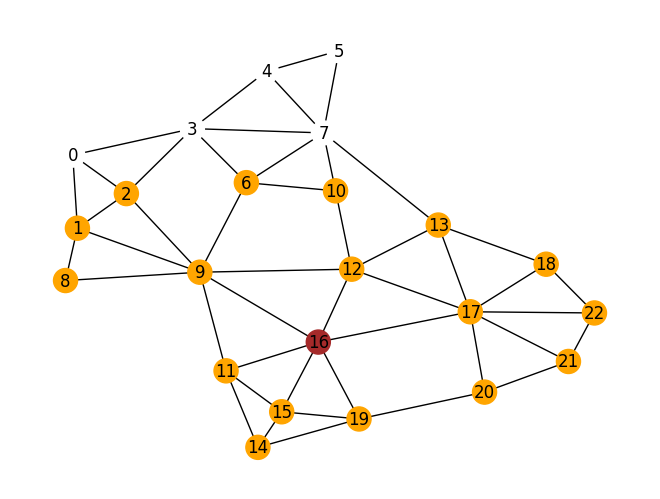

In [ ]:
# TODO Find the nodes in hidden layer 1 that connect to the nodes in hidden layer 2
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.  Make sure not to sample nodes that were already included in hidden layer 2 our the output layer.
# The nodes at hidden layer 1 are the union of these nodes and the nodes in hidden layer 2
# Replace this line:
# hidden_layer1_nodes = np.zeros((n_nodes,1));

# Assuming A is your adjacency matrix and output_node_idx is defined
output_node_idx = 16  # Node 16

# Step 1: Find the nodes in hidden layer 2 that connect to the output layer
hidden_layer2_nodes = A[:, output_node_idx]
connected_hidden_layer2 = np.where(hidden_layer2_nodes == 1)[0]  # Indices of connected nodes in hidden layer 2

# Step 2: Find nodes in hidden layer 1 that connect to hidden layer 2
hidden_layer1_nodes = np.zeros(n_nodes)  # Initialize hidden layer 1 nodes
for i in connected_hidden_layer2:
    hidden_layer1_nodes += A[:, i]  # Sum connections from hidden layer 1 to each node in hidden layer 2

# Step 3: Identify the active nodes in hidden layer 1 (i.e., those connected to hidden layer 2)
active_hidden_layer1_nodes = np.where(hidden_layer1_nodes > 0)[0]
# Combine active nodes from hidden layer 2 and the output layer
excluded_nodes = np.concatenate((connected_hidden_layer2, [output_node_idx]))

# Step 4: Sample n_sample nodes from active_hidden_layer1_nodes excluding the already included nodes
n_sample = 5  # Define the number of samples you want
# Filter out nodes that are in excluded_nodes
valid_nodes = [node for node in active_hidden_layer1_nodes if node not in excluded_nodes]
if valid_nodes:  # Check if there are valid nodes to sample from
    n_sample = min(n_sample, len(valid_nodes))  # Ensure we don't sample more than available
    sampled_nodes = np.random.choice(valid_nodes, size=n_sample, replace=False)
    # Create a mask for the sampled nodes
    hidden_layer1_sampled_nodes = np.zeros_like(hidden_layer1_nodes)
    hidden_layer1_sampled_nodes[sampled_nodes] = 1
else:
    hidden_layer1_sampled_nodes = np.zeros_like(hidden_layer1_nodes)  # If no valid nodes, use zero array

draw_graph_structure(A, output_layer_nodes, hidden_layer1_nodes)

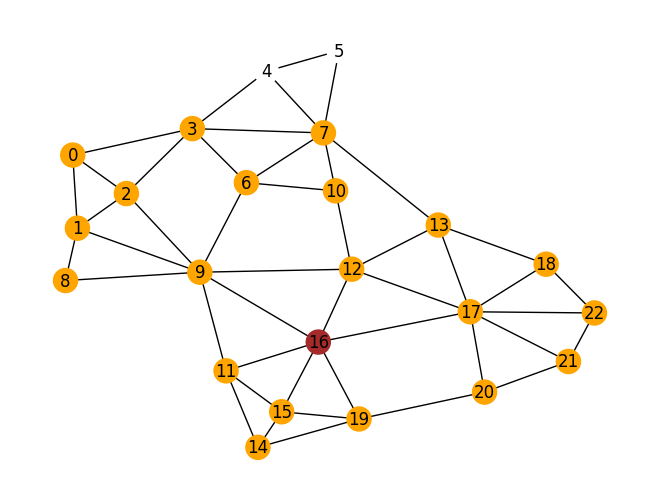

In [ ]:
# TODO Find the nodes in the input layer that connect to the nodes in hidden layer 1
# using the adjacency matrix.  Then sample n_sample of these nodes randomly without
# replacement.  Make sure not to sample nodes that were already included in hidden layer 1,2, or the output layer.
# The nodes at the input layer are the union of these nodes and the nodes in hidden layers 1 and 2
# Replace this line:
# input_layer_nodes = np.zeros((n_nodes,1));

# Assuming A is your adjacency matrix and the previous layers have been defined
output_node_idx = 16

# Step 1: Find the nodes in hidden layer 1 that connect to hidden layer 2
# (this part is assumed to be done already and you should have hidden_layer1_nodes defined)
# Now let's find the nodes in hidden layer 1 that connect to the input layer
input_layer_nodes = np.zeros(n_nodes)  # Initialize input layer nodes

# Find nodes that connect to hidden layer 1
for i in range(n_nodes):  # Iterate through each node in hidden layer 1
    if hidden_layer1_nodes[i] > 0:  # If it's an active node in hidden layer 1
        input_layer_nodes += A[:, i]  # Sum connections from input layer to this node in hidden layer 1

# Step 2: Identify active nodes in hidden layer 1 and hidden layer 2, and output layer
active_hidden_layer1_nodes = np.where(hidden_layer1_nodes > 0)[0]
active_hidden_layer2_nodes = np.where(hidden_layer2_nodes > 0)[0]
excluded_nodes = np.concatenate((active_hidden_layer1_nodes, active_hidden_layer2_nodes, [output_node_idx]))

# Step 3: Sample n_sample nodes from input_layer_nodes excluding the already included nodes
n_sample = 5  # Define the number of samples you want
valid_nodes = [i for i in range(n_nodes) if input_layer_nodes[i] > 0 and i not in excluded_nodes]  # Get valid nodes
if valid_nodes:  # Check if there are valid nodes to sample from
    n_sample = min(n_sample, len(valid_nodes))  # Ensure we don't sample more than available
    sampled_nodes = np.random.choice(valid_nodes, size=n_sample, replace=False)
    # Create a mask for the sampled nodes
    input_layer_sampled_nodes = np.zeros_like(input_layer_nodes)
    input_layer_sampled_nodes[sampled_nodes] = 1
else:
    input_layer_sampled_nodes = np.zeros_like(input_layer_nodes)  # If no valid nodes, use zero array


draw_graph_structure(A, output_layer_nodes, input_layer_nodes)

If you did this correctly, there should be 9 yellow nodes in the figure.  The "receptive field" of node 16 in the output layer increases much more slowly as we move back through the layers of the network.